In [1]:
# Step 1: Load the image folder (either personal folder or google drive)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os, sys, importlib

# Step 2: Clone all the github code to the latest code
user = "swarajnanda2021"
repo = "MSKCC_SSL"
src_dir = "."

if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

# Step 3: Add the repo to your system path and load all modules you need
path = f"{repo}/{src_dir}"
if not path in sys.path:
    sys.path.insert(1, path)

import Encoders, DataAug, Methods, Scheduler, Utils


Cloning into 'MSKCC_SSL'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 157 (delta 14), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (157/157), 582.33 KiB | 5.49 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [3]:
# Step 4: Define some functions to instantiate encoders
EMBEDDING_DIM = 512

def resnet18():# 11.439168M parameters
    layers=[2, 2, 2, 2]
    model = Encoders.ResNet(block = Encoders.BasicBlock, layers = layers,outputchannels = EMBEDDING_DIM)
    return model

def resnet34():
    layers   = [3, 5, 7, 5]
    model    = Encoders.ResNet(block = Encoders.BasicBlock, layers = layers, outputchannels = EMBEDDING_DIM)
    return model

def resnet50():# 24.557120M parameters
    layers=[3, 4, 6, 3]
    return Encoders.ResNet(block = Encoders.Bottleneck, layers = layers, outputchannels = EMBEDDING_DIM)

def ViT_tiny():
    model = Encoders.ViT_encoder(image_size=224,
                    patch_size=16,
                    in_channels=3,
                    embedding_dim=EMBEDDING_DIM,  # Reduced embedding dimension
                    feature_size=256, # If you set self.head to nn.Identity(), then final matrix will be embedding_dim size and not feature_size
                    n_blocks=12,        # Similar to the base model
                    n_heads=3,          # Fewer heads than the base model
                    mlp_ratio=4.0,
                    qkv_bias=True,
                    attention_dropout=0.1,  # You might adjust dropout rates
                    projection_dropout=0.1)
    return model


# Step 5: Instantiate an encoder
encoder = resnet18()

# Step 6: Instantiate a dataloader for SimCLR
IMAGE_SIZE = 224
custom_transforms = DataAug.ContrastiveTransformations(
            size=IMAGE_SIZE,
            nviews=2,
            horizontal_flip=True,
            resized_crop=True,
            color_jitter=True,
            random_grayscale=True,
            brightness=0.5,
            contrast=0.5,
            saturation=0.5,
            hue=0.1,
            color_jitter_p=0.8,
            grayscale_p=0.2,
            to_tensor=True,
            normalize=True,
            mean=(0.5,),
            std=(0.5,)
        )

import torch, torchvision
trainset = torchvision.datasets.ImageFolder(
                    root          =   './drive/MyDrive/SSL_Datasets/imagewoof2-320/train',
                    transform     =   custom_transforms,
                    )
BATCH_SIZE = 250
dataloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

# Step 7: Instantiate a Method class based on the data augmentation object (in this case SimCLR)
device = torch.device("cuda")
EPOCHS = 50
simclr_model    = Methods.simCLR(
                            encoder         = encoder,
                            device          = device,
                            batch_size      = BATCH_SIZE,
                            epochs          = EPOCHS,
                            savepath        = './SimCLR_resnet18_imagewoof.pth',
                            )

# Step 8: Train the model on the dataloader
simclr_loss_iter  =   simclr_model.train(dataloader)


Epoch 1/50: 100%|██████████| 37/37 [27:20<00:00, 44.34s/it, loss=5.37]


Checkpoint saved to ./SimCLR_resnet18_imagewoof.pth


Epoch 11/50: 100%|██████████| 37/37 [04:11<00:00,  6.81s/it, loss=2.24]


Checkpoint saved to ./SimCLR_resnet18_imagewoof.pth


Epoch 21/50: 100%|██████████| 37/37 [04:06<00:00,  6.67s/it, loss=1.52]


Checkpoint saved to ./SimCLR_resnet18_imagewoof.pth


Epoch 31/50: 100%|██████████| 37/37 [04:06<00:00,  6.66s/it, loss=1.45]


Checkpoint saved to ./SimCLR_resnet18_imagewoof.pth


Epoch 41/50: 100%|██████████| 37/37 [04:21<00:00,  7.08s/it, loss=0.99]


Checkpoint saved to ./SimCLR_resnet18_imagewoof.pth


Epoch 46/50:   5%|▌         | 2/37 [00:14<04:21,  7.48s/it, loss=0.994]


FileNotFoundError: [Errno 2] No such file or directory: './drive/MyDrive/SSL_Datasets/imagewoof2-320/train/n02086240/n02086240_5925.JPEG'

In [19]:
# EEPS I lost the data somewhere
torch.cuda.empty_cache()
EPOCHS = 50
simclr_model    = Methods.simCLR(
                            encoder         = encoder,
                            device          = device,
                            batch_size      = BATCH_SIZE,
                            epochs          = EPOCHS,
                            savepath        = '/content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth',
                            )

# Step 8: Train the model on the dataloader
simclr_model.load_checkpoint('/content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth', device)
simclr_loss_iter  =   simclr_model.train(dataloader)

Checkpoint loaded from /content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth


Epoch 1/50: 100%|██████████| 37/37 [04:07<00:00,  6.69s/it, loss=1.17]


Checkpoint saved to /content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth


Epoch 11/50: 100%|██████████| 37/37 [04:13<00:00,  6.85s/it, loss=0.946]


Checkpoint saved to /content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth


Epoch 21/50: 100%|██████████| 37/37 [04:13<00:00,  6.86s/it, loss=1.03]


Checkpoint saved to /content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth


Epoch 31/50: 100%|██████████| 37/37 [04:11<00:00,  6.79s/it, loss=1.05]


Checkpoint saved to /content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth


Epoch 41/50: 100%|██████████| 37/37 [04:13<00:00,  6.86s/it, loss=0.918]


Checkpoint saved to /content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth


Epoch 50/50: 100%|██████████| 37/37 [04:12<00:00,  6.84s/it, loss=0.801]


In [6]:
# Step 9: Save the last epoch model to google drive
simclr_model.save_checkpoint('/content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth')
# Step 10: Clear GPU memory and reload the simclr model into it
torch.cuda.empty_cache()
simclr_model.load_checkpoint('/content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth', device)

Checkpoint saved to /content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth
Checkpoint loaded from /content/drive/MyDrive/SimCLR_UMAP/SimCLR_resnet18_imagewoof_50epochs.pth


In [11]:
# Step 11: Extract encoder and get representations from the validation dataset
from tqdm import tqdm
from torchvision import datasets, transforms
import numpy as np

model = simclr_model.get_encoder()
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.ImageFolder(root='./drive/MyDrive/SSL_Datasets/imagewoof2-320/val', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)


def get_representations(model, dataloader, device):
    model.eval()
    representations = []
    with torch.no_grad():
        for images, _ in tqdm(dataloader):  # Removed tqdm for debugging
            images = images.to(device)
            features = model(images)  # Directly use model as it is the encoder
            representations.append(features.cpu().numpy())
    return np.concatenate(representations, axis=0)

# Testing the modified function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
representations = get_representations(model, testloader, device)


100%|██████████| 4/4 [10:02<00:00, 150.75s/it]


In [12]:
# Step 12: Install UMAP and load the library
%pip install umap-learn
import umap.umap_ as umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=000bef027cf3ec409bc2a90dc71cf27882b1473a68a16722fd19292bde70a93b
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


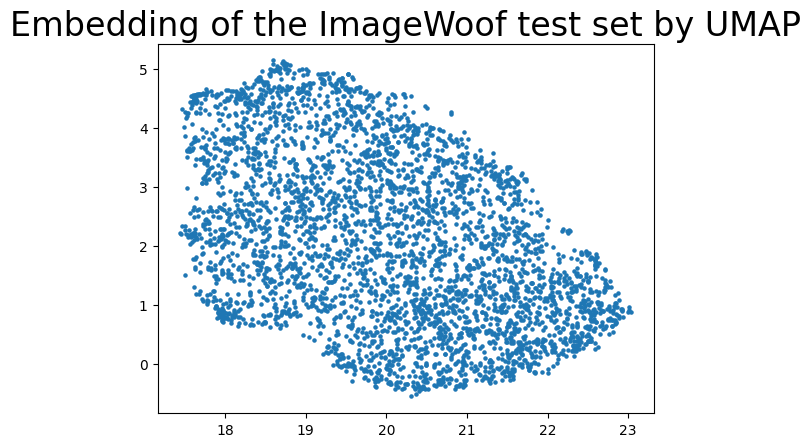

In [18]:
# Step 13: Apply UMAP and check clustering
trans = umap.UMAP(n_neighbors=30, min_dist=0.001,random_state=42).fit(representations)
import matplotlib.pyplot as plt
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5)
plt.title('Embedding of the ImageWoof test set by UMAP', fontsize=24);
